## Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [3]:
graph_palette_5 = ['#4D455D', '#E96479', '#9BB8CD', '#7DB9B6', '#A459D1']
graph_palette_4 = ['#4D455D', '#E96479', '#9BB8CD', '#7DB9B6']

In [4]:
file_path = '/content/drive/MyDrive/Portfolio - Data Analysis | BI/Job Salary/job_salaries_treated.csv'

In [5]:
df = pd.read_csv(file_path)

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_model
0,2023,Junior,Full-time,Analytics Engineer,43000,USD,43000,Hungary,0,Hungary,Large,In-person
1,2023,Expert,Full-time,Data Scientist,239900,USD,239900,United States,100,United States,Medium,Remote
2,2023,Expert,Full-time,Data Scientist,159900,USD,159900,United States,100,United States,Medium,Remote
3,2023,Junior,Full-time,Data Analyst,162240,USD,162240,United States,0,United States,Medium,In-person
4,2023,Junior,Full-time,Data Analyst,47840,USD,47840,United States,0,United States,Medium,In-person


In [7]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
work_model            object
dtype: object

## 1.How many jobs are there?

In [8]:
job_list = df['job_title'].unique()
job_list

array(['Analytics Engineer', 'Data Scientist', 'Data Analyst',
       'Data Engineer', 'Data Science', 'Business Intelligence Analyst',
       'Research Engineer', 'Applied Scientist', 'Data Analytics Manager',
       'Research Analyst', 'Machine Learning Engineer',
       'Research Scientist', 'Prompt Engineer', 'Data Manager',
       'Business Intelligence Engineer', 'Machine Learning Scientist',
       'Computer Vision Engineer', 'Data Science Lead', 'ML Engineer',
       'AI Product Manager', 'Data Analytics Lead', 'Data Specialist',
       'Director of Data Science', 'Data Architect', 'Data Product Owner',
       'Data Developer', 'Machine Learning Infrastructure Engineer',
       'Data Product Manager', 'Data Lead', 'AI Engineer',
       'Data Integration Engineer', 'Data Management Analyst',
       'BI Developer', 'Data Visualization Specialist', 'BI Analyst',
       'Data Science Consultant', 'Data Science Engineer',
       'Business Data Analyst', 'Machine Learning Operations 

In [9]:
qnt_job_title = df['job_title'].value_counts()
qnt_job_title

Data Engineer                      2344
Data Scientist                     2129
Data Analyst                       1518
Machine Learning Engineer          1070
Research Scientist                  305
                                   ... 
Staff Machine Learning Engineer       1
Power BI Developer                    1
Deep Learning Researcher              1
Data Analyst Lead                     1
Consultant Data Engineer              1
Name: job_title, Length: 131, dtype: int64

In [10]:
for job, count in qnt_job_title.items():
  print(f"{job}: {count}")

Data Engineer: 2344
Data Scientist: 2129
Data Analyst: 1518
Machine Learning Engineer: 1070
Research Scientist: 305
Applied Scientist: 292
Analytics Engineer: 274
Data Architect: 243
Research Engineer: 167
Business Intelligence Engineer: 162
Data Manager: 140
ML Engineer: 118
Data Science Manager: 96
Machine Learning Scientist: 80
Business Intelligence Analyst: 74
BI Developer: 56
Research Analyst: 53
Data Science Consultant: 49
AI Engineer: 46
Data Specialist: 44
Data Analytics Manager: 41
Decision Scientist: 38
Head of Data: 33
Machine Learning Infrastructure Engineer: 31
BI Analyst: 31
Director of Data Science: 31
Data Science: 30
Computer Vision Engineer: 28
Data Science Lead: 22
AI Scientist: 22
Data Modeler: 22
Business Data Analyst: 21
Data Quality Analyst: 20
AI Developer: 18
ETL Developer: 18
Data Strategist: 18
Business Intelligence Developer: 17
BI Data Analyst: 17
Machine Learning Researcher: 17
Data Science Engineer: 16
Data Lead: 16
Data Operations Engineer: 16
Machine Le

As we could observe, there are a lot of job titles for the same position, so I decided to consider just the most popular job title registered in order to avoid major complex treatment for this simple analysis:
- Data Engineer: 2344
- Data Scientist: 2129
- Data Analyst: 1518
- Machine Learning Engineer: 1070


In [11]:
df = df[(df['job_title'] == 'Data Engineer') |
        (df['job_title'] == 'Data Scientist') |
        (df['job_title'] == 'Data Analyst') |
        (df['job_title'] == 'Machine Learning Engineer')]
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_model
1,2023,Expert,Full-time,Data Scientist,239900,USD,239900,United States,100,United States,Medium,Remote
2,2023,Expert,Full-time,Data Scientist,159900,USD,159900,United States,100,United States,Medium,Remote
3,2023,Junior,Full-time,Data Analyst,162240,USD,162240,United States,0,United States,Medium,In-person
4,2023,Junior,Full-time,Data Analyst,47840,USD,47840,United States,0,United States,Medium,In-person
5,2023,Expert,Full-time,Data Engineer,130410,USD,130410,United States,0,United States,Medium,In-person
...,...,...,...,...,...,...,...,...,...,...,...,...
10192,2020,Expert,Full-time,Machine Learning Engineer,40000,EUR,45618,Croatia,100,Croatia,Small,Remote
10194,2021,Intermediate,Full-time,Data Scientist,160000,SGD,119059,Singapore,100,Israel,Medium,Remote
10196,2021,Intermediate,Full-time,Data Engineer,24000,EUR,28369,Malta,50,Malta,Large,Hybrid
10198,2020,Expert,Full-time,Data Scientist,412000,USD,412000,United States,100,United States,Large,Remote


## 2.Over the years, what has been the behavior of salaries by career?

In [12]:
salary_by_job_and_year = df.groupby(['job_title', 'work_year'])['salary_in_usd'].median().reset_index()

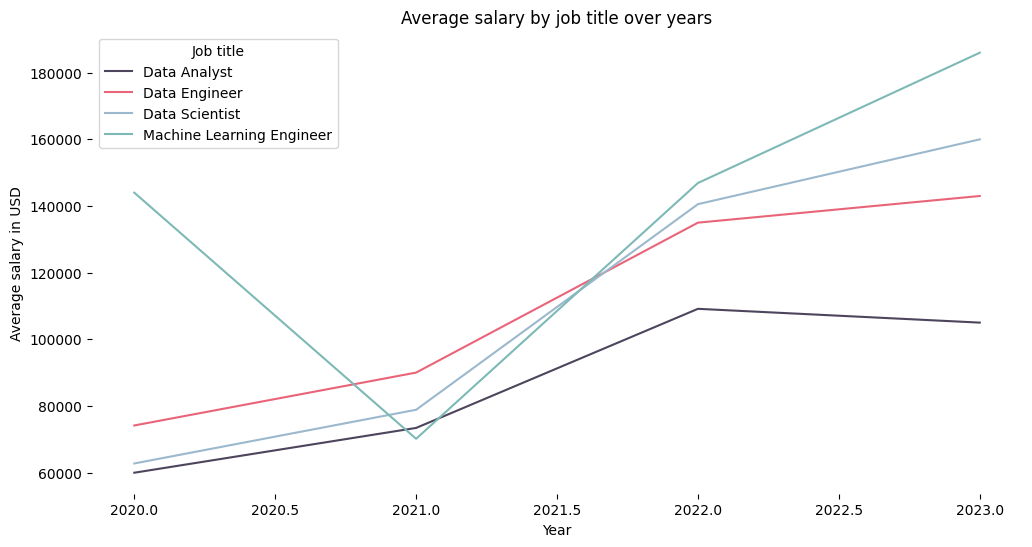

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=salary_by_job_and_year,
             x='work_year',
             y='salary_in_usd',
             hue='job_title',
             palette=graph_palette_4)

for spine in plt.gca().spines.values():
  spine.set_visible(False)

plt.xlabel('Year')
plt.ylabel('Average salary in USD')
plt.title('Average salary by job title over years')
plt.legend(title='Job title')
plt.show()

### 2.1.Why was there a considerable drop in the salary of Machine Learning Engineers in 2021?

In [14]:
machine_learning_eng = df.loc[df['job_title'] == "Machine Learning Engineer"]

In [15]:
quantity_ml_eng = machine_learning_eng.groupby('work_year')[['job_title','work_year']].value_counts()

In [16]:
quantity_ml_eng

work_year  job_title                
2020       Machine Learning Engineer      4
2021       Machine Learning Engineer     18
2022       Machine Learning Engineer    108
2023       Machine Learning Engineer    940
dtype: int64

In [17]:
salaries_ml_eng = df[['work_year','job_title','experience_level', 'company_location','employee_residence','salary_in_usd']].loc[(df['job_title'] == 'Machine Learning Engineer') & ((df['work_year'] == 2020) | (df['work_year'] == 2021))]

In [18]:
salaries_ml_eng.sort_values(by=['work_year','salary_in_usd'])

,work_year,job_title,experience_level,company_location,employee_residence,salary_in_usd
10192,2020,Machine Learning Engineer,Expert,Croatia,Croatia,45618
10008,2020,Machine Learning Engineer,Junior,United States,United States,138000
10080,2020,Machine Learning Engineer,Expert,United States,United States,150000
10005,2020,Machine Learning Engineer,Junior,United States,United States,250000
9957,2021,Machine Learning Engineer,Junior,India,India,20000
10112,2021,Machine Learning Engineer,Junior,Colombia,Colombia,21844
10107,2021,Machine Learning Engineer,Expert,India,India,24342
10105,2021,Machine Learning Engineer,Junior,Germany,Germany,24823
10146,2021,Machine Learning Engineer,Intermediate,Slovenia,Slovenia,24823
10135,2021,Machine Learning Engineer,Intermediate,Poland,Poland,46597


- In 2020, there were only four salaries registered, and three of them were from US companies, which offer the highest salaries in USD. However, in 2021, there were 18 salaries registered, with the majority from other countries that pay less in USD for the same position.
- The drop in Machine Learning Engineer salaries from 2020 to 2021 isn't indicative of a market trend; it's merely a result of data bias.

### 2.2.Conclusions.
- Salaries have shown significant growth from 2020 to 2023. However, this doesn't accurately reflect the growth rate, as there were fewer records from 2020 to 2021 compared to 2022 and 2023.
- The Data Analysis and Data Engineering careers exhibited salary stagnation from 2022 to 2023. This could be attributed to several factors, such as the accelerated growth in these fields during the pandemic, followed by a transition to a phase of equilibrium.
- The continuous growth in Data Science and Machine Learning careers may be related to the emergence of artificial intelligence.

## 3.Which are the countries with the highest salaries in 2023?

We are considering only countries with a minimum of 10 samples to avoid salary biases

In [19]:
minimum_records = 10

In [20]:
country_salary_23 = df[['work_year','company_location','salary_in_usd']].loc[df['work_year'] == 2023]
mean_country_salary_23 = country_salary_23.groupby('company_location', as_index=False).mean()
mean_country_salary_23.sort_values(by='salary_in_usd', ascending=False)

,company_location,work_year,salary_in_usd
33,Ukraine,2023.0,230000.000000
3,Australia,2023.0,160325.800000
5,Canada,2023.0,159083.362319
35,United States,2023.0,157481.261938
12,Germany,2023.0,122766.500000
31,Switzerland,2023.0,122638.000000
16,Ireland,2023.0,106882.166667
34,United Kingdom,2023.0,102734.099602
28,South Africa,2023.0,100492.500000
19,Lithuania,2023.0,100410.000000


In [49]:
df_2023 = df[df['work_year'] == 2023]

records_per_country_2023 = df_2023.groupby('company_location').size()

median_register_2023 = records_per_country_2023.median()

print(f"On average, there were {median_register_2023} records per country in 2023.")

On average, there were 3.0 records per country in 2023.


In [22]:
df_2023 = df[df['work_year'] == 2023]

# Group by 'company_location' without making it an index and calculate the mean salary and record count.
average_salaries = df_2023.groupby('company_location', as_index=False).agg(
    mean_salary=pd.NamedAgg(column='salary_in_usd', aggfunc='mean'),
    count=pd.NamedAgg(column='salary_in_usd', aggfunc='count')
)

# Filter the countries with the required minimum number of records.
filtered_average_salaries = average_salaries[average_salaries['count'] >= minimum_records]

# Sort the countries by the mean salary in descending order and get the top 4
top_countries = filtered_average_salaries.sort_values(by='mean_salary', ascending=False).head(4)

top_countries

,company_location,mean_salary,count
3,Australia,160325.800000,10
5,Canada,159083.362319,138
35,United States,157481.261938,5047
12,Germany,122766.500000,14


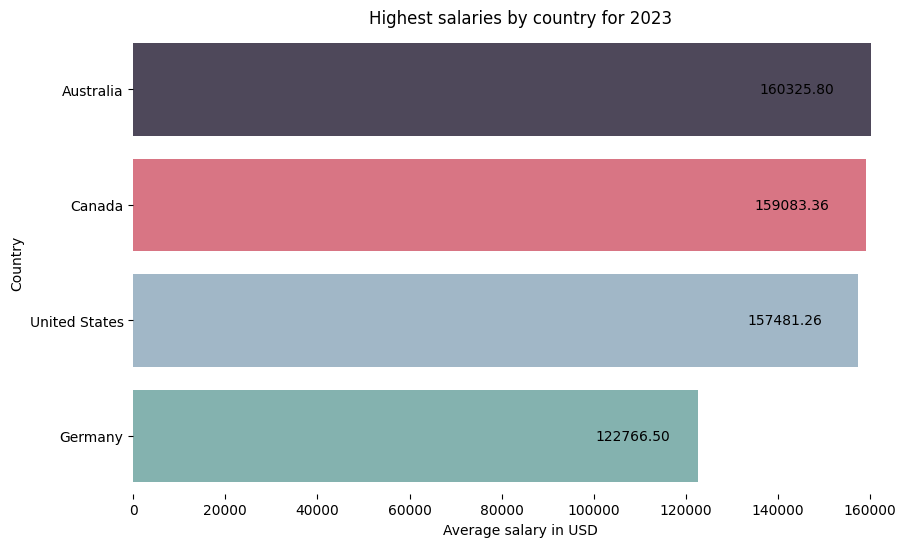

In [51]:
df_sorted = top_countries.sort_values('mean_salary', ascending=False)

plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    data=df_sorted,
    x='mean_salary',
    y='company_location',
    palette=graph_palette_4
)

for spine in plt.gca().spines.values():
  spine.set_visible(False)

for bar in barplot.patches:
  barplot.annotate(format(bar.get_width(), '.2f'),
                   (bar.get_width() - (bar.get_width() * 0.05),
                    bar.get_y() + bar.get_height()/2),
                   ha = 'right', va = 'center',
                   size = 10, xytext = (0,0),
                   textcoords = 'offset points')

plt.xlabel('Average salary in USD')
plt.ylabel('Country')
plt.title('Highest salaries by country for 2023')
plt.show()

### 3.1.The four top-ranking countries in terms of salary
- Australia: \$ 160325.00
- Canada: \$ 159083.00
- United States: \$ 157481.00
- Germany: \$ 122766.00

\
**Considering yearly salaries.**

### 3.2.What is the behavior of these salaries over the past few years?

In [59]:
best_countries = df.loc[(df['company_location'] == 'Australia') |
    (df['company_location'] == 'Canada') |
    (df['company_location'] == 'United States') |
    (df['company_location'] == 'Germany')]
best_countries.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_model
1,2023,Expert,Full-time,Data Scientist,239900,USD,239900,United States,100,United States,Medium,Remote
2,2023,Expert,Full-time,Data Scientist,159900,USD,159900,United States,100,United States,Medium,Remote
3,2023,Junior,Full-time,Data Analyst,162240,USD,162240,United States,0,United States,Medium,In-person
4,2023,Junior,Full-time,Data Analyst,47840,USD,47840,United States,0,United States,Medium,In-person
5,2023,Expert,Full-time,Data Engineer,130410,USD,130410,United States,0,United States,Medium,In-person


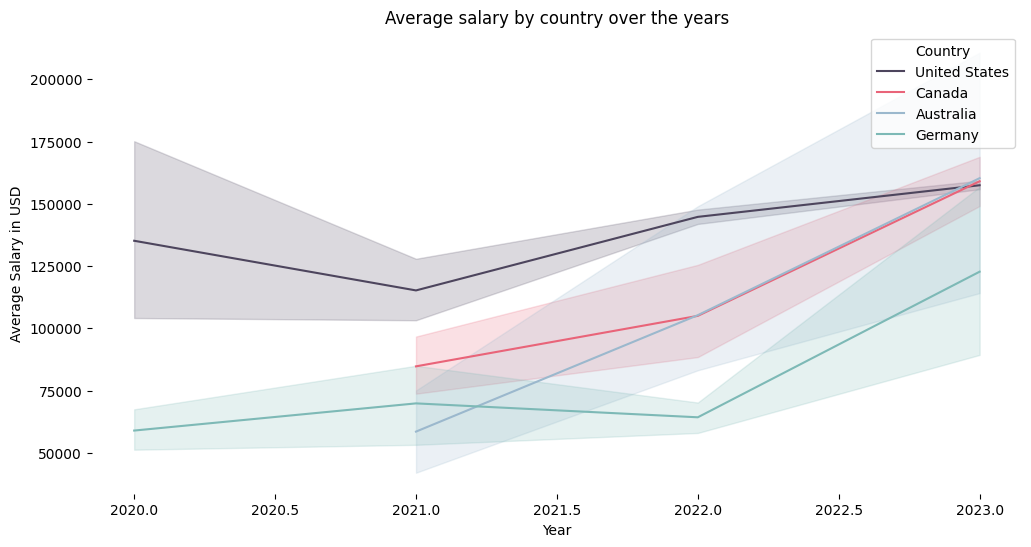

In [60]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=best_countries,
             x='work_year',
             y='salary_in_usd',
             hue='company_location',
             palette=graph_palette_4)

for spine in plt.gca().spines.values():
  spine.set_visible(False)

plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.title('Average salary by country over the years')
plt.legend(title='Country')
plt.show()

- All these countries have seen an increase in the average salaries from 2020 to 2023.
- The country with the most significant variation in salaries is Germany and Australia.

### 3.3.How many employees are there in each country, categorized by their level of work experience?

In [61]:
filtered_df = df.query('company_location == "Australia" or company_location == "Canada" or company_location == "United States" or company_location == "Germany"')

qnt_employees = filtered_df.groupby(['company_location', 'work_year', 'experience_level']).size().reset_index(name='quantity_employees')
qnt_employees.sort_values(by=['work_year', 'quantity_employees'], ascending=False)

,company_location,work_year,experience_level,quantity_employees
36,United States,2023,Expert,3841
37,United States,2023,Intermediate,847
38,United States,2023,Junior,225
35,United States,2023,Director,134
12,Canada,2023,Expert,110
13,Canada,2023,Intermediate,23
22,Germany,2023,Expert,10
5,Australia,2023,Intermediate,8
14,Canada,2023,Junior,5
23,Germany,2023,Intermediate,3


In [62]:
qnt_employees_us = qnt_employees.loc[qnt_employees['company_location'] == 'Australia']
qnt_employees_can = qnt_employees.loc[qnt_employees['company_location'] == 'Canada']
qnt_employees_uk = qnt_employees.loc[qnt_employees['company_location'] == 'United States']
qnt_employees_ger = qnt_employees.loc[qnt_employees['company_location'] == 'Germany']

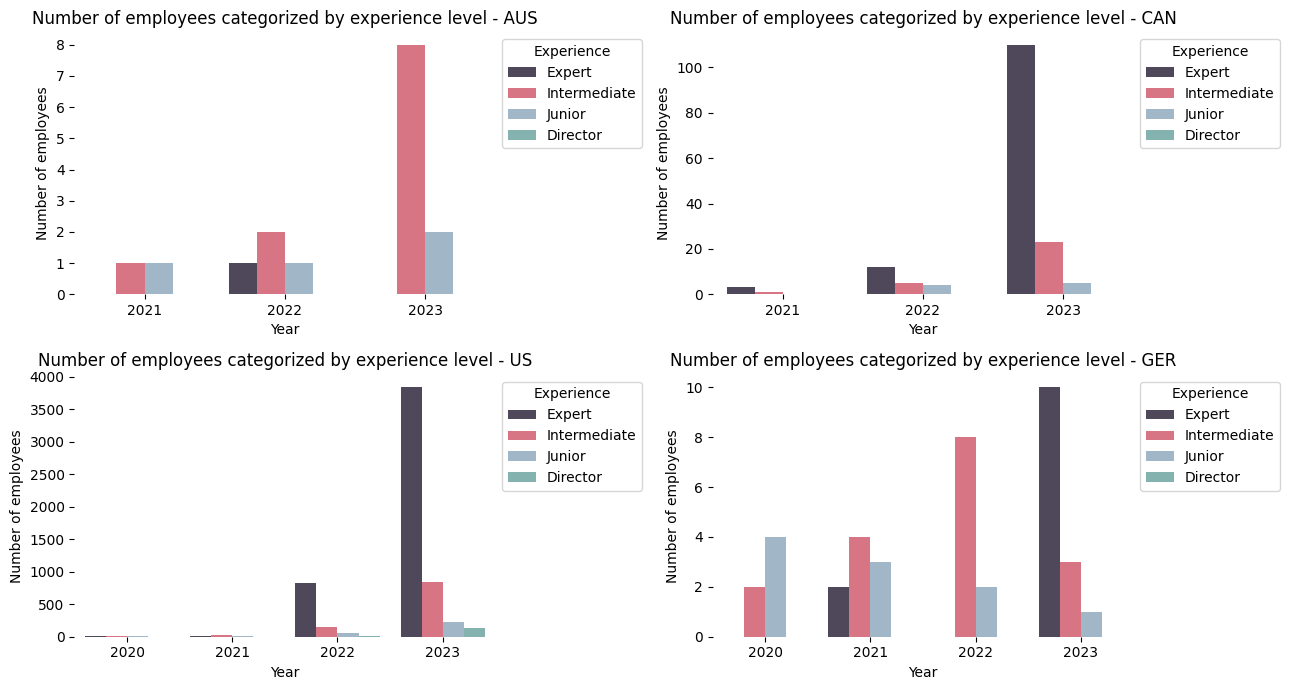

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(13, 7))

dataframes = [qnt_employees_us, qnt_employees_can, qnt_employees_uk, qnt_employees_ger]
country = ["AUS", "CAN", "US", "GER"]
experience_order = ["Expert", "Intermediate", "Junior", "Director"]

for ax, df_i, country_i in zip(axs.flatten(), dataframes, country):
    sns.barplot(
        data=df_i,
        x="work_year",
        y="quantity_employees",
        hue="experience_level",
        palette=graph_palette_5,
        hue_order=experience_order,
        ax=ax
    )

    ax.set_xlabel("Year")
    ax.set_ylabel("Number of employees")
    ax.set_title(f"Number of employees categorized by experience level - {country_i}")
    ax.legend(title='Experience', loc='upper left', bbox_to_anchor=(1, 1))

    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

- We can observe that in the 5 countries with the highest salaries, the number of records of employees with senior or intermediate positions are much higher than the number of records for entry-level positions.
- Germany increased its number of senior positions in 2023.

### 3.4.What is the number of records for each work model by country?

In [64]:
filtered_df = df.query('company_location == "Australia" or company_location == "Canada" or company_location == "United States" or company_location == "Germany"')

qnt_work_model = filtered_df.groupby(['company_location', 'work_year', 'work_model']).size().reset_index(name='quantity_work_model')
qnt_work_model.sort_values(by=['work_year', 'quantity_work_model'], ascending=False)

,company_location,work_year,work_model,quantity_work_model
31,United States,2023,In-person,3387
32,United States,2023,Remote,1655
9,Canada,2023,In-person,68
10,Canada,2023,Remote,68
4,Australia,2023,In-person,10
21,Germany,2023,Remote,6
30,United States,2023,Hybrid,5
19,Germany,2023,Hybrid,4
20,Germany,2023,In-person,4
8,Canada,2023,Hybrid,2


In [65]:
qnt_work_model_us = qnt_work_model.loc[qnt_work_model['company_location'] == 'Australia']
qnt_work_model_can = qnt_work_model.loc[qnt_work_model['company_location'] == 'Canada']
qnt_work_model_uk = qnt_work_model.loc[qnt_work_model['company_location'] == 'United States']
qnt_work_model_ger = qnt_work_model.loc[qnt_work_model['company_location'] == 'Germany']

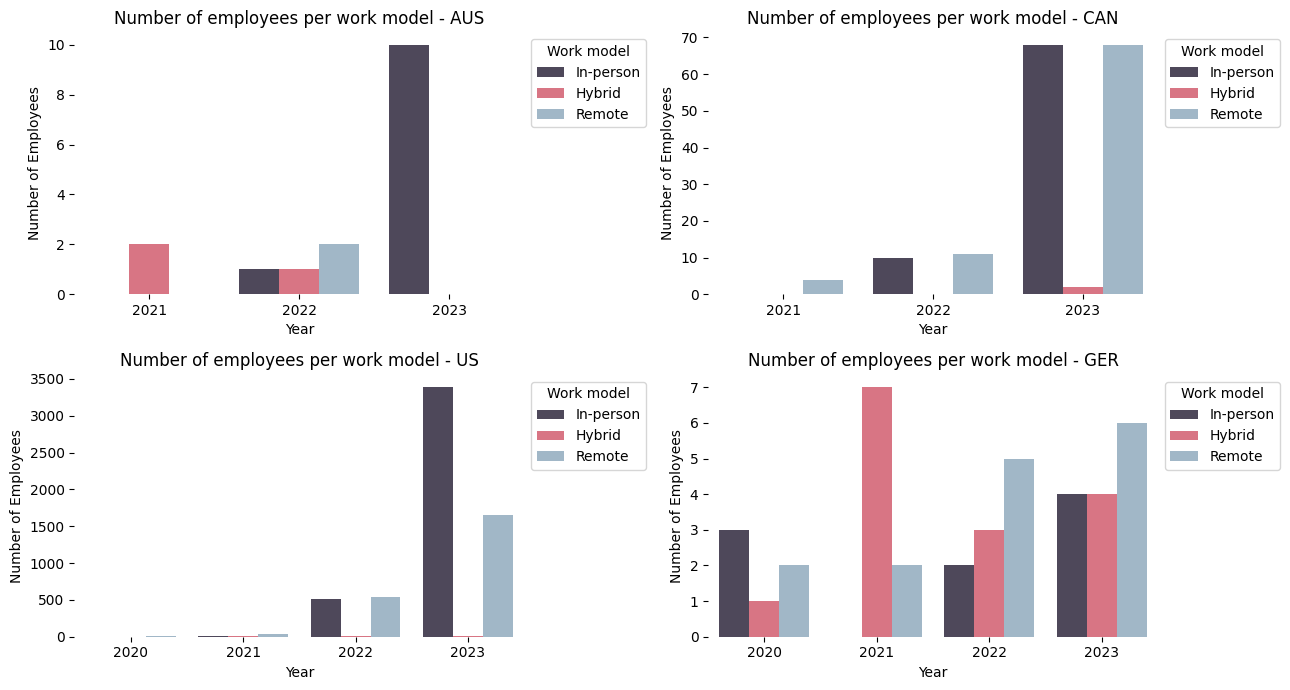

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(13, 7))

dataframes = [qnt_work_model_us, qnt_work_model_can, qnt_work_model_uk, qnt_work_model_ger]
country = ["AUS", "CAN", "US", "GER"]
work_model_order = ["In-person", "Hybrid", "Remote"]

for ax, df_i, country_i in zip(axs.flatten(), dataframes, country):
    sns.barplot(
        data=df_i,
        x="work_year",
        y="quantity_work_model",
        hue="work_model",
        palette=graph_palette_5,
        hue_order=work_model_order,
        ax=ax
    )

    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Employees")
    ax.set_title(f"Number of employees per work model - {country_i}")
    ax.legend(title='Work model', loc='upper left', bbox_to_anchor=(1, 1))

    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

- In most countries, the In-person work model is the most frequent, followed by Remote
- The only country that showed a significant amount of the Hybrid work model was Germany.

### 3.5.Conclusions.
The majority of the recorded salaries are from the US, which could introduce bias into the analysis. However, for study purposes, I disregarded this factor and proceeded with the analysis anyway. Considering the median number of records per country is 3, I decided to analyze only countries with more than 10 salaries registered.

- The countries with the best average salaries are the Australia, Canada, United States, and Germany.
- Over the year, the mean salaries in all of these countries have grown.
- With the exception of Australia, all countries show an increase in the number of records for expert-level employees. This suggests that the growth in salaries may be partly due to an increase in senior employees, rather than a general rise in the career field itself (although there is growth regardless).
- Australia exhibited a significant number of intermediate-level records, which could indicate that careers related to data in this country are growing in terms of salary.
- In the United States, Canada and Australia, the majority of recorded contracts are In-person. In contrast, Germany show a more balanced distribution between contract types. Based on this data, the type of contract may not significantly influence the salary.
- The high increase in Germany salary from 2021 to 2023 may be due to the increase in number of records of Expert employees.



## 4.Which are the countries with the lowest salaries in 2023?

We are considering only countries with a minimum of 10 samples to avoid salary biases

In [67]:
# Group by 'company_location' without making it an index and calculate the mean salary and record count.
df_2023 = df[df['work_year'] == 2023]

average_salaries = df_2023.groupby('company_location', as_index=False).agg(
    mean_salary=pd.NamedAgg(column='salary_in_usd', aggfunc='mean'),
    count=pd.NamedAgg(column='salary_in_usd', aggfunc='count')
)

# Filter the countries with the required minimum number of records
filtered_average_salaries = average_salaries[average_salaries['count'] >= minimum_records]

# Sort the countries by the mean salary in descending order and get the top 4
bottom_countries = filtered_average_salaries.sort_values(by='mean_salary', ascending=True).head(4)

bottom_countries

,company_location,mean_salary,count
15,India,42729.200000,10
29,Spain,50357.629630,54
7,Colombia,83833.333333,12
11,France,95796.727273,11


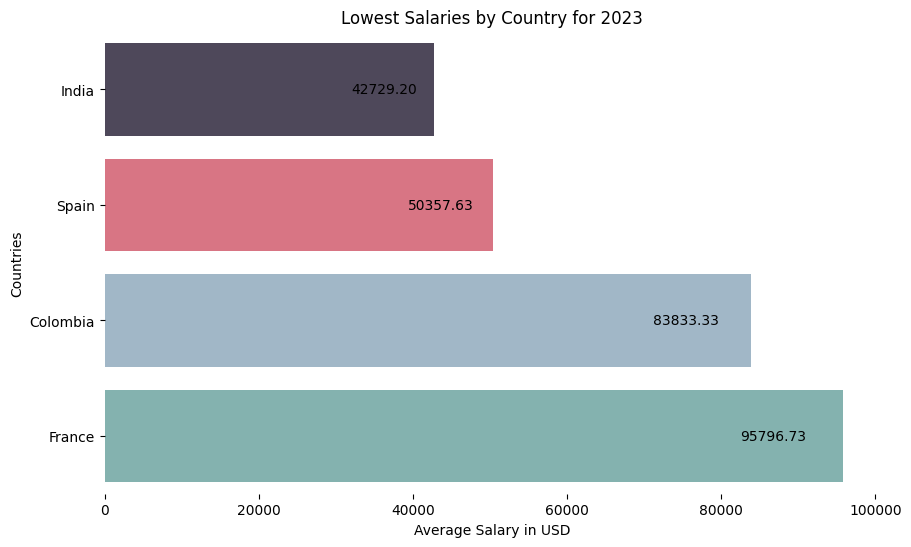

In [33]:
plt.figure(figsize=(10,6))
barplot = sns.barplot(
    data= bottom_countries,
    x='mean_salary',
    y='company_location',
    palette=graph_palette_4
)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for bar in barplot.patches:
    barplot.annotate(format(bar.get_width(), '.2f'),
                     (bar.get_width() - (bar.get_width() * 0.05), bar.get_y() + bar.get_height() / 2),
                     ha = 'right', va = 'center',
                     size = 10, xytext = (0, 0),
                     textcoords = 'offset points')

plt.xlabel('Average Salary in USD')
plt.ylabel('Countries')
plt.title('Lowest Salaries by Country for 2023')
plt.show()

### 4.1.The four lowest-ranking countries in terms of salary
- India: \$ 42729.00
- Spain: \$ 50357.00
- Colombia: \$ 83833.00
- France: \$ 95796.00

\
**Considering yearly salaries.**

### 4.2.What is the behavior of these salaries over the past few years?

In [34]:
bottom_countries = df.loc[(df['company_location'] == 'India') |
                        (df['company_location'] == 'Spain') |
                        (df['company_location'] == 'Colombia') |
                        (df['company_location'] == 'France')]
bottom_countries.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_model
268,2023,Expert,Full-time,Data Scientist,60000,EUR,64781,Spain,0,Spain,Medium,In-person
269,2023,Expert,Full-time,Data Scientist,38000,EUR,41027,Spain,0,Spain,Medium,In-person
529,2023,Expert,Full-time,Data Engineer,172700,USD,172700,India,0,India,Medium,In-person
530,2023,Expert,Full-time,Data Engineer,82900,USD,82900,India,0,India,Medium,In-person
709,2023,Expert,Full-time,Data Scientist,60000,EUR,64781,Spain,0,Spain,Medium,In-person


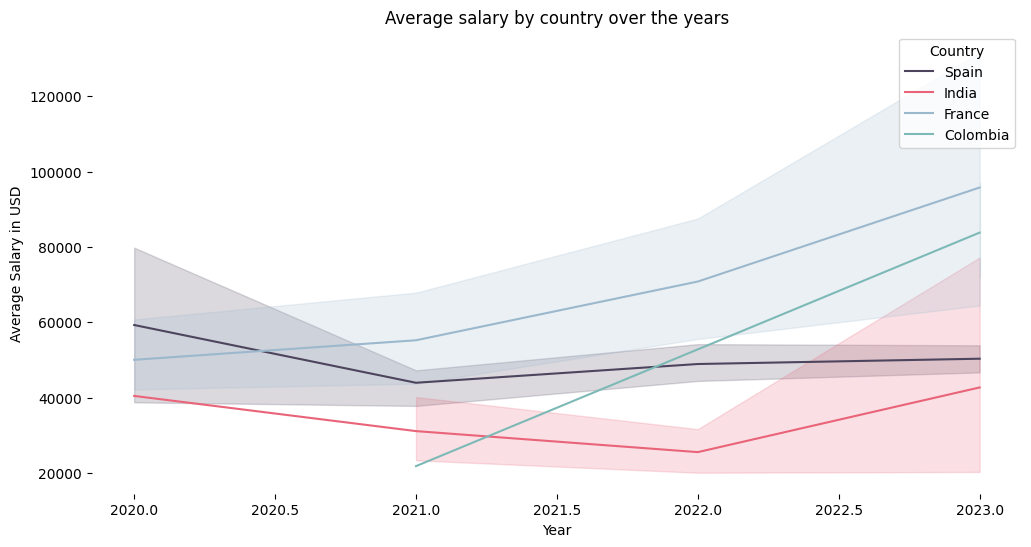

In [35]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=bottom_countries,
             x='work_year',
             y='salary_in_usd',
             hue='company_location',
             palette=graph_palette_4)

for spine in plt.gca().spines.values():
  spine.set_visible(False)

plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.title('Average salary by country over the years')
plt.legend(title='Country')
plt.show()

- India, Colombia and France have been showing a growth on their salaries on 2023.
- Even France and Colombia being in the lowest salaries, they are they are near to UK salaries in 2023.
- Only Spain showed a salary stagnation from 2021 to 2023.

### 4.3.How many employees are there in each country, categorized by their level of work experience?

In [36]:
filtered_df = df.query('company_location == "India" or company_location == "Spain" or company_location == "France" or company_location == "Colombia"')

qnt_employees = filtered_df.groupby(['company_location', 'work_year', 'experience_level']).size().reset_index(name='quantity_employees')
qnt_employees.sort_values(by=['work_year', 'quantity_employees'], ascending=False)

,company_location,work_year,experience_level,quantity_employees
27,Spain,2023,Expert,41
28,Spain,2023,Intermediate,10
11,France,2023,Intermediate,9
1,Colombia,2023,Expert,6
2,Colombia,2023,Intermediate,6
20,India,2023,Junior,5
18,India,2023,Expert,3
29,Spain,2023,Junior,3
10,France,2023,Expert,2
19,India,2023,Intermediate,2


In [37]:
qnt_employees_ind = qnt_employees.loc[qnt_employees['company_location'] == 'India']
qnt_employees_spa = qnt_employees.loc[qnt_employees['company_location'] == 'Spain']
qnt_employees_col = qnt_employees.loc[qnt_employees['company_location'] == 'Colombia']
qnt_employees_fra = qnt_employees.loc[qnt_employees['company_location'] == 'France']

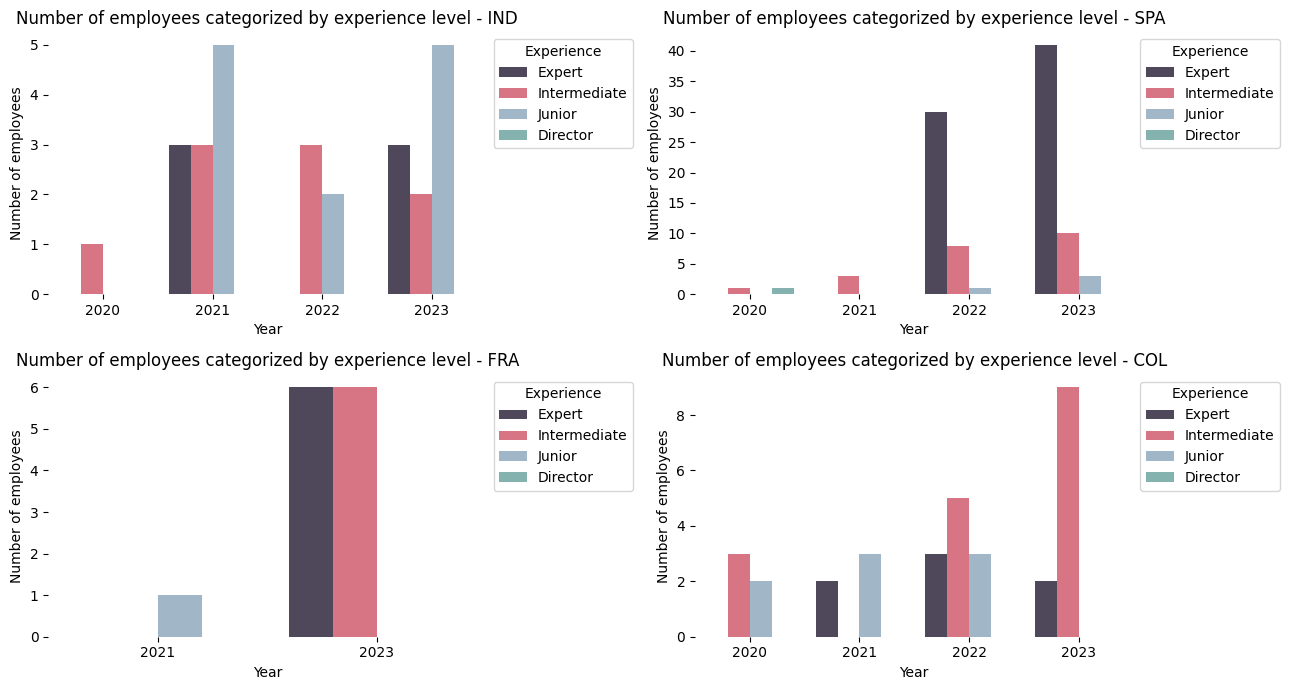

In [55]:
fig, axs = plt.subplots(2, 2, figsize=(13, 7))

dataframes = [qnt_employees_ind, qnt_employees_spa, qnt_employees_col, qnt_employees_fra]
country = ["IND", "SPA", "FRA", "COL"]
experience_order = ["Expert", "Intermediate", "Junior", "Director"]

for ax, df_i, country_i in zip(axs.flatten(), dataframes, country):
    sns.barplot(
        data=df_i,
        x="work_year",
        y="quantity_employees",
        hue="experience_level",
        palette=graph_palette_5,
        hue_order=experience_order,
        ax=ax
    )

    ax.set_xlabel("Year")
    ax.set_ylabel("Number of employees")
    ax.set_title(f"Number of employees categorized by experience level - {country_i}")
    ax.legend(title='Experience', loc='upper left', bbox_to_anchor=(1, 1))

    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

- India shows more Junior experience level records than other countries.
- Spain shows more Expert experience level records, similar to countries with high salaries.
- France Shows eather Expert and Intermediate experience records.
- Colombia shows more Intermadiate level records.

### 4.4.What is the number of records for each work model by country?

In [39]:
filtered_df = df.query('company_location == "India" or company_location == "France" or company_location == "Colombia" or company_location == "Spain"')

qnt_work_model = filtered_df.groupby(['company_location', 'work_year', 'work_model']).size().reset_index(name='quantity_work_model')
qnt_work_model.sort_values(by=['work_year', 'quantity_work_model'], ascending=False)

,company_location,work_year,work_model,quantity_work_model
26,Spain,2023,In-person,40
27,Spain,2023,Remote,14
1,Colombia,2023,In-person,6
2,Colombia,2023,Remote,6
10,France,2023,Remote,6
19,India,2023,Remote,4
8,France,2023,Hybrid,3
17,India,2023,Hybrid,3
18,India,2023,In-person,3
9,France,2023,In-person,2


In [40]:
qnt_work_model_ind = qnt_work_model.loc[qnt_work_model['company_location'] == 'India']
qnt_work_model_spa = qnt_work_model.loc[qnt_work_model['company_location'] == 'Spain']
qnt_work_model_fra = qnt_work_model.loc[qnt_work_model['company_location'] == 'France']
qnt_work_model_col = qnt_work_model.loc[qnt_work_model['company_location'] == 'Colombia']

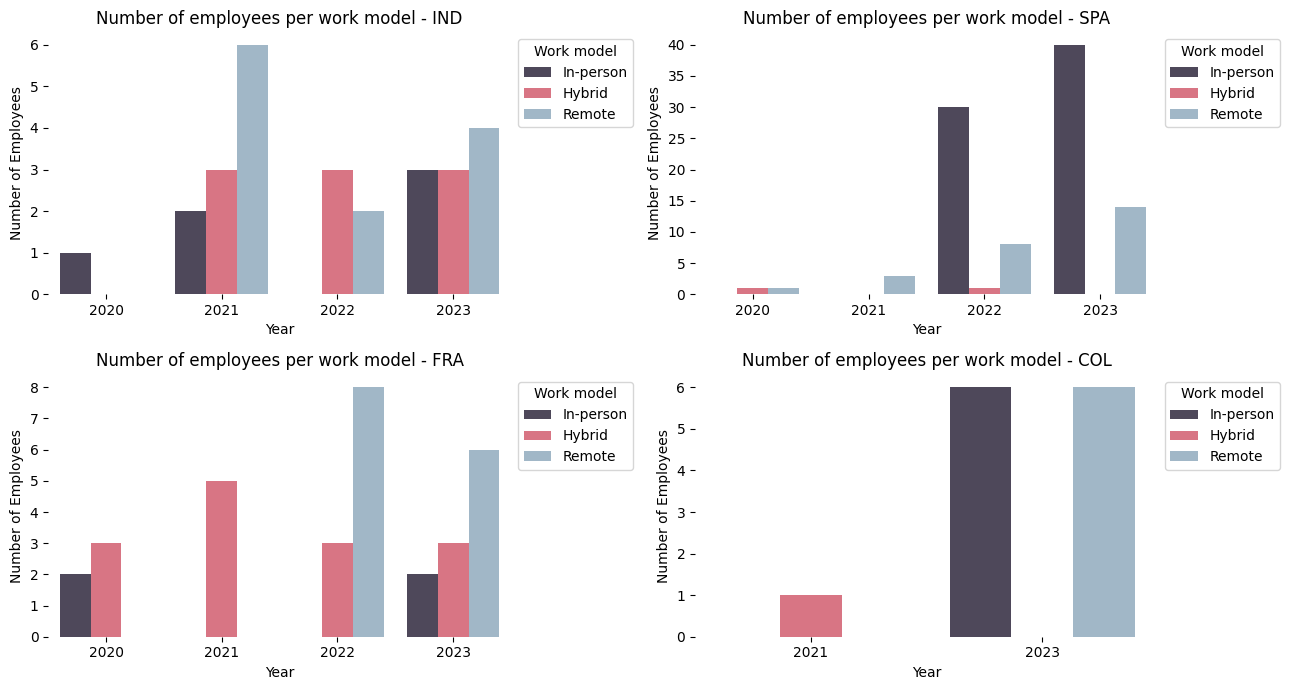

In [58]:
fig, axs = plt.subplots(2, 2, figsize=(13, 7))

dataframes = [qnt_work_model_ind, qnt_work_model_spa, qnt_work_model_fra, qnt_work_model_col]
country = ["IND", "SPA", "FRA", "COL"]
work_model_order = ["In-person", "Hybrid", "Remote"]

for ax, df_i, country_i in zip(axs.flatten(), dataframes, country):
    sns.barplot(
        data=df_i,
        x="work_year",
        y="quantity_work_model",
        hue="work_model",
        palette=graph_palette_5,
        hue_order=work_model_order,
        ax=ax
    )

    ax.set_xlabel("Year")
    ax.set_ylabel("Number of Employees")
    ax.set_title(f"Number of employees per work model - {country_i}")
    ax.legend(title='Work model', loc='upper left', bbox_to_anchor=(1, 1))

    for spine in ax.spines.values():
        spine.set_visible(False)

plt.tight_layout()
plt.show()

- India displays a balanced work model in 2023, with a decrease in remote work from 2021 to 2022, followed by a slight increase in 2023.
- Spain shows a greater prevalence of the In-person work model compared to remote or hybrid.
- France shows a higher proportion of remote and hybrid work models compared to in-person.
- Colombia displays a balanced work model between in-person and remote in 2023.

### 4.5.Conclusions.
- The countries with the lowest average salaries are India, Spain, Colombia, and France.
- The gap between the salaries in France and Colombia is not as significant compared to the countries with the highest salaries. However, India and Spain show a considerable salary difference compared to other countries.
- Despite their low salary base, these countries have seen salary growth each year, which could be attributed to overall career growth.
- The limited number of records for these countries may introduce bias into the analysis.
- A higher frequency of junior-level positions in India may explain the lower salaries there. Of course, these salaries also reflect the country's reality, including the cost of living, culture, politics, etc.
- For countries like Colombia (COL) and France (FRA), a substantial number of intermediate-level records could contribute to a lower average salary when compared with other countries.
- Spain, despite its lower salaries, has a considerable number of expert-level positions. This may be due to other factors such as a lower minimum wage and a lower cost of living compared to other countries.

## 5.Which countries have the highest number of salary records by career in 2023?

In [42]:
df_23 = df[['work_year','company_location','job_title']].loc[df['work_year'] == 2023]

In [43]:
qnt_records_country = df_23.groupby(['company_location']).size().reset_index(name='quantity_records')
qnt_records_country.sort_values(by=['quantity_records'], ascending=False)

,company_location,quantity_records
35,United States,5047
34,United Kingdom,251
5,Canada,138
29,Spain,54
12,Germany,14
7,Colombia,12
11,France,11
3,Australia,10
15,India,10
10,Estonia,9


In [44]:
qnt_records_job = df_23.groupby(['job_title']).size().reset_index(name='quantity_records')
qnt_records_job.sort_values(by=['quantity_records'], ascending=False)

,job_title,quantity_records
1,Data Engineer,1806
2,Data Scientist,1664
0,Data Analyst,1220
3,Machine Learning Engineer,940


## 6.What is the average salary by company size?

To analyze this aspect, I selected a specific country, year to minimize data bias:
- Country: United States
- Year: 2023

\
These selections are based on the number of records available.

In [70]:
df_filtered_ds = df.loc[(df["work_year"] == 2023) & ((df["company_location"] == "United States")) & (df["job_title"] == "Data Scientist")]
df_filtered_ml = df.loc[(df["work_year"] == 2023) & ((df["company_location"] == "United States")) & (df["job_title"] == "Machine Learning Engineer")]
df_filtered_da = df.loc[(df["work_year"] == 2023) & ((df["company_location"] == "United States")) & (df["job_title"] == "Data Analyst")]
df_filtered_de = df.loc[(df["work_year"] == 2023) & ((df["company_location"] == "United States")) & (df["job_title"] == "Data Engineer")]

In [71]:
salary_by_comp_size_ds = df_filtered_ds[["company_size","salary_in_usd"]].groupby(by="company_size", as_index=False).mean()
salary_by_comp_size_ds

,company_size,salary_in_usd
0,Large,163588.235294
1,Medium,170233.305422
2,Small,164000.000000


In [72]:
salary_by_comp_size_ml = df_filtered_ml[["company_size","salary_in_usd"]].groupby(by="company_size", as_index=False).mean()
salary_by_comp_size_ml

,company_size,salary_in_usd
0,Large,184509.944444
1,Medium,195350.950839
2,Small,143750.000000


In [73]:
salary_by_comp_size_da = df_filtered_da[["company_size","salary_in_usd"]].groupby(by="company_size", as_index=False).mean()
salary_by_comp_size_da

,company_size,salary_in_usd
0,Large,110100.000000
1,Medium,113218.008475
2,Small,91000.000000


In [74]:
salary_by_comp_size_de = df_filtered_de[["company_size","salary_in_usd"]].groupby(by="company_size", as_index=False).mean()
salary_by_comp_size_de

,company_size,salary_in_usd
0,Large,161350.125000
1,Medium,155651.404866


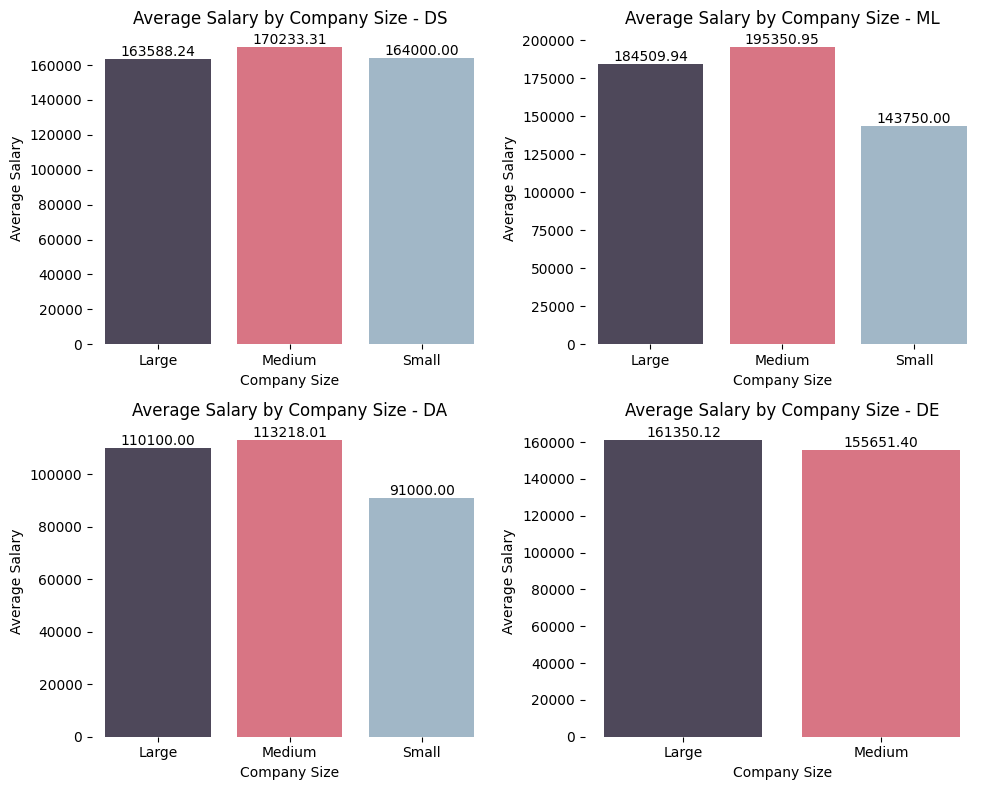

In [82]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

dataframes = [salary_by_comp_size_ds, salary_by_comp_size_ml, salary_by_comp_size_da, salary_by_comp_size_de]
job = ["DS", "ML", "DA", "DE"]

for ax, df_i, job_i in zip(axs.flatten(), dataframes, job):
    barplot = sns.barplot(
        data=df_i,
        x="company_size",
        y="salary_in_usd",
        palette=graph_palette_5,
        ax=ax
    )

    ax.set_xlabel("Company Size")
    ax.set_ylabel("Average Salary")
    ax.set_title(f"Average Salary by Company Size - {job_i}")

    for spine in ax.spines.values():
        spine.set_visible(False)

    for bar in barplot.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{bar.get_height():.2f}',
            ha='center',
            va='bottom',
            fontsize=10
        )

plt.tight_layout()
plt.show()

### 6.1.Conclusions
- There is not much difference among the salaries by company size.